## Introduction

In this activity we will use python and some of the built in functions to model a solute diffusion process. A complex function that arrises in many analytical solutions is termed the [Error function](https://en.wikipedia.org/wiki/Error_function).

In [46]:
# Import only the math.erfc (complementary error function) and math.erf (error function) from the math Library
from scipy.special import erfc as erfc
from scipy.special import erf as erf

# Print the error function of a few different numbers
print (erfc(1))
print(erfc(0))

0.15729920705028516
1.0


We also need to import a few useful packages for working with vectors (numpy) and for plotting (matplotlib.pyplot)

In [47]:
import numpy as np
import matplotlib.pyplot as plt

Now we can plot the error function and complementary error function (this as a function equal to 1-erf(x)) in this example to better understand their shape:

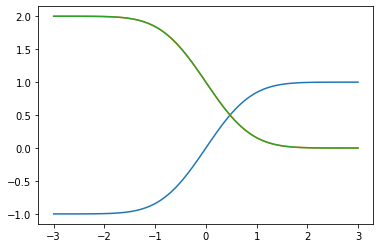

In [48]:
# define variable 'xe' with 100 values from -3 to 3
xe = np.linspace(-3, 3, num=100)
# plot error function
plt.plot(xe, erf(xe))
# plot complementary error function
plt.plot(xe, erfc(xe))
# equivalent to complementary error function
plt.plot(xe, 1-erf(xe))

## Diffusion function definition

Now let's define a function that calculates the diffusion between a region with solute initaly present with a concentration equal to one. This region is at x<0

In [49]:
def diffusion_fun(x, t, Df, C0):
    # Equation for concentration profile as a function of space (x) and time (t)
    C = C0/2*(erfc((x)/(2*np.sqrt(Df*t))))
    # Return the concentration (C) from this function
    return C

Aside: The square root function also exists in the 'math' library. It is important to use the 'numpy' library if we want to take the square root of an array of numbers. For example:

In [62]:
np.sqrt(xe[-5:])

array([1.660595  , 1.67874412, 1.69669911, 1.71446608, 1.73205081])

Attempting the same operation with the math library will result in an error stating that 'only size-1 arrays can be converted to Python scalars'. This means you can only perform the operation on scalars.

In [63]:
import math
math.sqrt(xe[-5:])

TypeError: only size-1 arrays can be converted to Python scalars

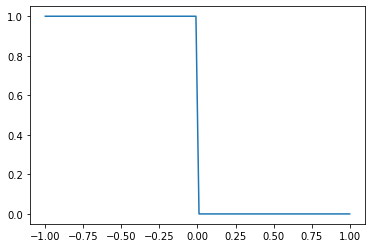

In [64]:
# Define diffusion coefficient
Df = 5E-9
# Define spatial coordinates
x = np.linspace(-1, 1, num=100)
# Define initial concentration
C0 = 1

# Profile after one second
t = 1
C = diffusion_fun(x, t, Df, C0)

plt.plot(x, C)

What are the units of space, time, and the diffusion coefficient?

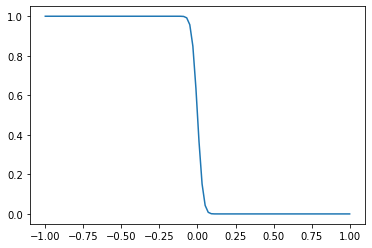

In [51]:
# Profile after one day
t = 60*60*24
C = diffusion_fun(x, t, Df, C0)

plt.plot(x, C)

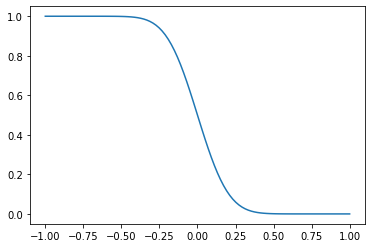

In [52]:
# Profile after 1 month
t = 60*60*24*30
C = diffusion_fun(x, t, Df, C0)

plt.plot(x, C)

Note that you can use the error function or the complementary error function to define your diffusion solution. This is demonstrated in the example below.

In [53]:
def diffusion_fun_erf(x, t, Df, C0):
    # Equation for concentration profile as a function of space (x) and time (t)
    C = C0/2*(1-erf((x)/(2*np.sqrt(Df*t))))
    # Return the concentration (C) from this function
    return C

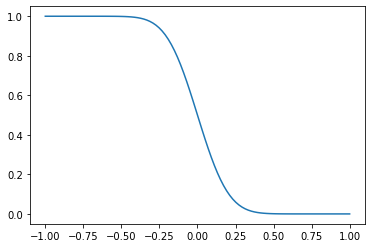

In [54]:
# Profile after 1 month
t = 60*60*24*30
C = diffusion_fun_erf(x, t, Df, C0)

plt.plot(x, C)

## Activity:

#### Using this code, test the impact of different diffusion coefficients. 

How do you expect this to change the shape of this curve? 

Plot the case of Df = 1E-9 and Df = 1E-10 after 1 day, 1 month, and 6 months. In the plot you generate make sure to add axis labels and a legend.